In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Downloads/revenue_data.csv", parse_dates = ["Month"], index_col = "Month")
df.head()

,Sales
Month,
2015-01-01,27716
2015-02-01,25536
2015-03-01,28896
2015-04-01,33540
2015-05-01,40755


In [3]:
df = df.dropna()

In [4]:
df.isna().sum()

Sales    0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of             Sales
Month            
2015-01-01  27716
2015-02-01  25536
2015-03-01  28896
2015-04-01  33540
2015-05-01  40755
2015-06-01  26386
2015-07-01  25591
2015-08-01  28598
2015-09-01  33306
2015-10-01  35156
2015-11-01  43036
2015-12-01  35778
2016-01-01  28390
2016-02-01  26533
2016-03-01  29580
2016-04-01  34278
2016-05-01  41160
2016-06-01  26871
2016-07-01  26076
2016-08-01  28302
2016-09-01  33304
2016-10-01  35721
2016-11-01  43044
2016-12-01  36337
2017-01-01  28054
2017-02-01  26505
2017-03-01  29583
2017-04-01  34371
2017-05-01  41340
2017-06-01  27370
2017-07-01  26726
2017-08-01  28819
2017-09-01  33120
2017-10-01  36290
2017-11-01  43656
2017-12-01  36200
2018-01-01  29068
2018-02-01  27030
2018-03-01  29750
2018-04-01  34056
2018-05-01  41567
2018-06-01  26800
2018-07-01  26400
2018-08-01  29808
2018-09-01  33855
2018-10-01  36290
2018-11-01  43665
2018-12-01  36417
2019-01-01  29756
2019-02-01  27692
2019-03-01  30444
2019-04-01  35

In [6]:
df.shape

(60, 1)

In [7]:
#x = df[["Sales"]]

<AxesSubplot:xlabel='Month'>

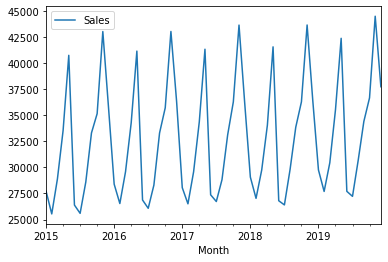

In [8]:
df.plot()

In [9]:
def checkStationarity(df):
    from statsmodels.tsa.stattools import adfuller
    res = adfuller(df)
    p_val = res[1]
    if p_val>0.05:
        print("Not Stationary")
    else:
        print("Stationary")

In [10]:
checkStationarity(df.Sales)

Not Stationary


In [11]:
#checkStationarity(df["Sales"].diff().dropna())

In [12]:
from pmdarima import auto_arima

In [13]:
auto_arima = auto_arima(df["Sales"], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1184.634, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1209.686, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1203.832, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1200.076, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1421.614, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1196.298, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1205.386, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1197.131, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1184.396, Time=0.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1192.090, Time=0.10 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1167.578, Time=0.27 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=1174.031, Time=0.27 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1182.550, Time=0.22 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : 

In [16]:
train_len = int(len(df["Sales"])*0.8)

In [18]:
train = df["Sales"][:train_len]
test = df["Sales"][train_len:]
print(train.shape)
print(test.shape)

(48,)
(12,)


In [19]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order = (4, 0, 2))
model_fit = model.fit()
model_fit.summary()

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                     ARMA(4, 2)   Log Likelihood                -458.036
Method:                       css-mle   S.D. of innovations           3098.749
Date:                Fri, 02 Jul 2021   AIC                            932.071
Time:                        16:30:36   BIC                            947.041
Sample:                    01-01-2015   HQIC                           937.728
                         - 12-01-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.247e+04    371.973     87.281      0.000    3.17e+04    3.32e+04
ar.L1.Sales     0.7425      0.210      3.543      0.000       0.332       1.153
ar.L2.Sales    -0.9983      0.178     -5.600      0.000      -1.348      -0.649
ar.L3.Sales     0.0127      0.183      0.070      0.945      -0.346       0.372
ar.L4.Sales    -0.2601      0.234     -1.113      0.266      -0.718       0.198
ma.L1.Sales    -0.7672      0.183     -4.196      0.000      -1.126      -0.409
ma.L2.Sales     1.0000      0.079     12.680      0.000       0.845       1.155
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5045           -0.8712j            1.0067           -0.1665
AR.2            0.5045           +0.8712j            1.0067            0.1665
AR.3           -0.4800           -1.8877j            1.9478           -0.2896
AR.4           -0.4800           +1.8877j            1.9478            0.2896
MA.1            0.3836           -0.9235j            1.0000           -0.1873
MA.2            0.3836           +0.9235j            1.0000            0.1873
-----------------------------------------------------------------------------
"""

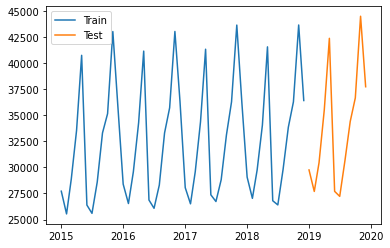

In [20]:
plt.plot(train, label = "Train")
plt.plot(test, label = "Test")
plt.legend()

In [21]:
start = len(train)
end = len(train)+len(test)-1 #OR end = len(x)-1
print(start, end)

48 59


In [22]:
ypred_test = model_fit.predict(start = start, end = end)

In [23]:
ypred_test

2019-01-01    26202.742912
2019-02-01    25945.506904
2019-03-01    31015.198024
2019-04-01    36791.017454
2019-05-01    38671.505619
2019-06-01    34433.173710
2019-07-01    28164.067046
2019-08-01    26262.350209
2019-09-01    30565.810852
2019-10-01    36681.970220
2019-11-01    38533.124916
2019-12-01    34351.162673
Freq: MS, dtype: float64

In [26]:
date = input("Enter the date : ")
start = "2019-01-01"
ypred_test = model_fit.predict(start=start,end=date)
print(ypred_test)

Enter the date : 2020-01-01
2019-01-01    26202.742912
2019-02-01    25945.506904
2019-03-01    31015.198024
2019-04-01    36791.017454
2019-05-01    38671.505619
2019-06-01    34433.173710
2019-07-01    28164.067046
2019-08-01    26262.350209
2019-09-01    30565.810852
2019-10-01    36681.970220
2019-11-01    38533.124916
2019-12-01    34351.162673
2020-01-01    28356.804449
Freq: MS, dtype: float64


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test, ypred_test)
mae = mean_absolute_error(test, ypred_test)
print("MSE is: ", mse)
print("RMSE is", np.sqrt(mse))
print("MAE is", mae)

MSE is:  13245259.077054033
RMSE is 3639.403670528186
MAE is 3012.4351973627586
